In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [11]:
df=pd.read_csv('insurance.csv')

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [13]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [14]:
df.shape

(1338, 7)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


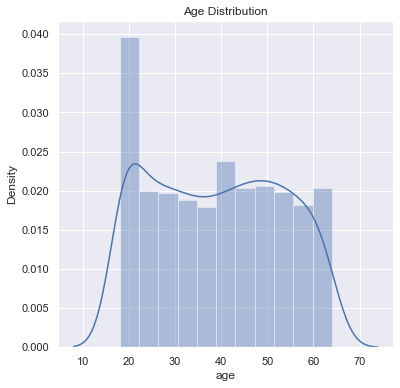

In [17]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title("Age Distribution")
plt.show()

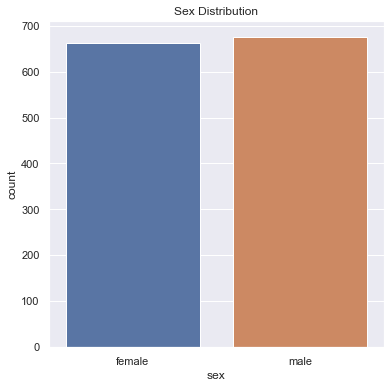

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=df)
plt.title("Sex Distribution")
plt.show()

In [22]:
df.value_counts("sex")

sex
male      676
female    662
dtype: int64

In [23]:
df.value_counts("region")

region
southeast    364
northwest    325
southwest    325
northeast    324
dtype: int64

In [24]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)

In [25]:
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [31]:
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)

In [32]:
x=df.drop(columns="expenses",axis=1)
y=df['expenses']

In [33]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.9,0,0,1
1,18,0,33.8,1,1,0
2,28,0,33.0,3,1,0
3,33,0,22.7,0,1,3
4,32,0,28.9,0,1,3
...,...,...,...,...,...,...
1333,50,0,31.0,3,1,3
1334,18,1,31.9,0,1,2
1335,18,1,36.9,0,1,0
1336,21,1,25.8,0,1,1


In [36]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [42]:
x_train.shape

(1070, 6)

In [43]:
x_test.shape

(268, 6)

In [47]:
reg=LinearRegression()

In [48]:
reg.fit(x_train,y_train)

LinearRegression()

In [50]:
training_data_prediction=reg.predict(x_train)

In [51]:
r2_train=metrics.r2_score(y_train,training_data_prediction)

In [52]:
r2_train

0.7370033016800563

In [53]:
test_data_prediction=reg.predict(x_test)

In [54]:
metrics.r2_score(y_test,test_data_prediction)

0.7957501448231192

In [55]:
sample_input_data=(50,0,30.7,1,0,1)

In [56]:
input_data_as_numpy_array=np.asarray(sample_input_data)

In [57]:
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

In [58]:
prediction=reg.predict(input_data_reshaped)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [60]:
print("The insurance cost is",prediction)

The insurance cost is [34647.99896813]
